In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

importing dataset train,test

In [74]:
testdata = pd.read_csv('C:/Users/Teju/Desktop/ML/Qs/Loan_Test.csv')
traindata = pd.read_csv('C:/Users/Teju/Desktop/ML/Qs/Loan_Train.csv')

In [13]:
features = traindata.columns
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
#checking the correlation
traindata.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


exploring how other features are effecting the target

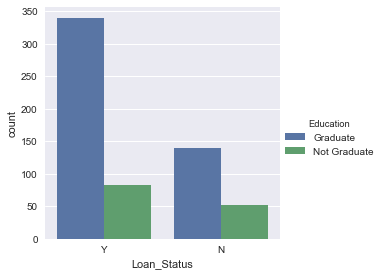

In [36]:
sb.factorplot('Loan_Status',data=traindata,kind='count',hue='Education')

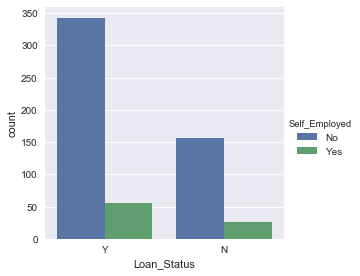

In [37]:
sb.factorplot('Loan_Status',data = traindata,kind='count',hue='Self_Employed')

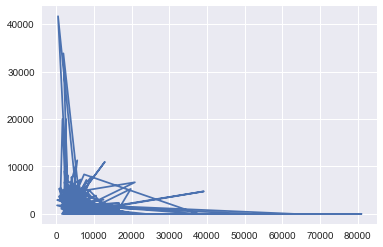

In [40]:
plt.plot(traindata['ApplicantIncome'],traindata['CoapplicantIncome'])

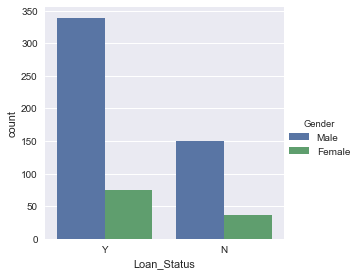

In [42]:
sb.factorplot('Loan_Status',kind='count',hue='Gender',data=traindata)

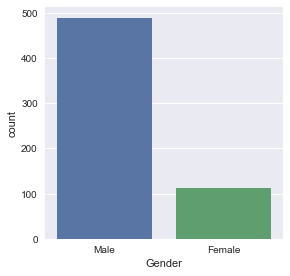

In [43]:
sb.factorplot('Gender',kind='count',data=traindata)

In [44]:
print(traindata['Gender'].value_counts())
print(traindata['Loan_Status'].value_counts())
print(traindata['Education'].value_counts())
#this is to show that no.of male != no.of female
#no.of graduate != no.of not graduated and hence direct conclusions from this graph causes problems

Male      489
Female    112
Name: Gender, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


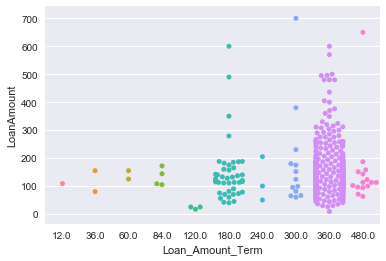

In [45]:
sb.swarmplot(x='Loan_Amount_Term',y='LoanAmount',data=traindata)

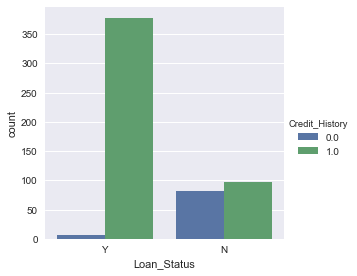

In [46]:
sb.factorplot('Loan_Status',hue='Credit_History',kind='count',data=traindata)

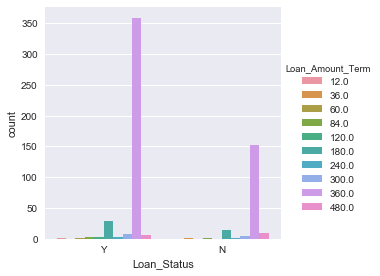

In [47]:
sb.factorplot('Loan_Status',data=traindata,kind='count',hue='Loan_Amount_Term')

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

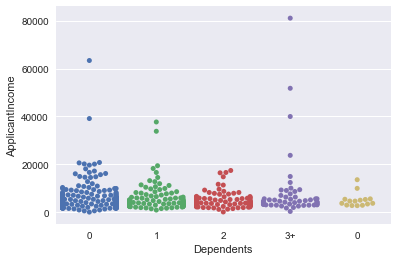

In [91]:
sb.swarmplot(x='Dependents',y='ApplicantIncome',data=traindata)

#traindata['Dependents'] = traindata['Dependents'].fillna(int(0))
traindata['Dependents'].value_counts()

In [57]:
print(traindata.isnull().any())
print(traindata.info()) 
#traindata['Dependents'] = traindata['Dependents'].fillna(traindata['Dependents'].mode(),inplace=True)
#traindata['Dependents']

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dty

In [38]:
#handling missing values/bringing the features to numeric format
traindata['Dependents'] = traindata['Dependents'].apply(lambda x:3 if x == '3+' else (np.nan if x is np.nan else int(x)))
traindata['Dependents'].fillna(traindata['Dependents'].mean(axis=0),inplace = True)


traindata['Gender'].fillna(traindata['Gender'].value_counts().idxmax(),inplace=True)
traindata['Gender'] = traindata['Gender'].apply(lambda x:0 if x == 'Female' else 1)



traindata['Married'].fillna(traindata['Married'].value_counts().idxmax(),inplace = True)
traindata['Married'] = traindata['Married'].apply(lambda x:0 if x == 'No' else 1)


traindata['Credit_History'].fillna(traindata['Credit_History'].value_counts().idxmax(),inplace=True)
traindata['Credit_History'] = traindata['Credit_History'].apply(lambda x:int(x))



In [64]:
#no NaN values present so just making the below feature an integer object in the below two
traindata['Education'] = traindata['Education'].apply(lambda x:1 if x == 'Graduate' else 0)

traindata['Property_Area']  = traindata['Property_Area'].apply(lambda x:2 if x=='Urban' else(0 if x=='Rural' else 1))


#no type conversions required so only fillin the NaN values in the below two
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].value_counts().idxmax(),inplace=True)

traindata['LoanAmount'].fillna(traindata.LoanAmount.mean(),inplace=True)


We cannot comment that educated people are self employed because below graph tells a different story with this imbalanced data

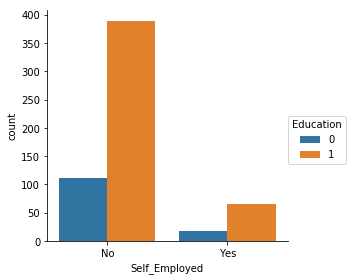

In [42]:
sb.factorplot('Self_Employed',kind= 'count',hue='Education',data =traindata)

In [44]:
#there is little we could say if a educated is employed and uneducated is unemplyed because the data is imbalanced and the present results cannot draw this conclusion
traindata['Self_Employed'].fillna(traindata['Self_Employed'].value_counts().idxmax(),inplace=True)

traindata['Self_Employed']=traindata['Self_Employed'].apply(lambda x:0 if x == 'No' else 1)

In [65]:
traindata.Loan_Status = traindata.Loan_Status.apply(lambda x:0 if x == 'N' else 1)

In [68]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators = 100).fit(traindata.iloc[:,1:12],traindata['Loan_Status'])


In [76]:
testdata.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [75]:
#handling missing values/bringing the features to numeric format
testdata['Dependents'] = testdata['Dependents'].apply(lambda x:3 if x == '3+' else (np.nan if x is np.nan else int(x)))
testdata['Dependents'].fillna(testdata['Dependents'].mean(axis=0),inplace = True)


testdata['Gender'].fillna(testdata['Gender'].value_counts().idxmax(),inplace=True)
testdata['Gender'] = testdata['Gender'].apply(lambda x:0 if x == 'Female' else 1)



testdata['Married'].fillna(testdata['Married'].value_counts().idxmax(),inplace = True)
testdata['Married'] = testdata['Married'].apply(lambda x:0 if x == 'No' else 1)


testdata['Credit_History'].fillna(testdata['Credit_History'].value_counts().idxmax(),inplace=True)
testdata['Credit_History'] = testdata['Credit_History'].apply(lambda x:int(x))



testdata['Self_Employed'].fillna(testdata['Self_Employed'].value_counts().idxmax(),inplace=True)
testdata['Self_Employed'] = testdata['Self_Employed'].apply(lambda x:0 if x == 'No' else 1)



#no NaN values present so just making the below feature an integer object in the below two
testdata['Education'] = testdata['Education'].apply(lambda x:1 if x == 'Graduate' else 0)

testdata['Property_Area']  = testdata['Property_Area'].apply(lambda x:2 if x=='Urban' else(0 if x=='Rural' else 1))


#no type conversions required so only fillin the NaN values in the below two
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].value_counts().idxmax(),inplace=True)

testdata['LoanAmount'].fillna(testdata.LoanAmount.mean(),inplace=True)



In [78]:
ypred = rfc.predict(testdata.iloc[:,1:])

In [82]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [84]:
submission = pd.DataFrame({'Loan_ID': testdata['Loan_ID'],'Loan_Status':ypred})

In [86]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
